In [1]:
!pip install fbprophet

In [6]:
# 모듈가져오기
import warnings
# 경고 무시 처리
warnings.filterwarnings('ignore')

# 기본
import numpy as np
import pandas as pd

# 예측용
from fbprophet import Prophet
# 시간처리
from datetime import datetime

from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

In [3]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=e15d3c3edd94847319adabc42196ccfb26f76858023457e98119bae0271593f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-y1e5382v/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [9]:
# 데이터 불러오기
# /content/drive/My Drive/데이터분석 프로젝트/data/독립변수 data/kosdaq_top10.csv
path = '/content/drive/My Drive/데이터분석 프로젝트/data/독립변수 data/kosdaq_top10.csv'

tmp = pd.read_csv(path, encoding='utf-8')
tmp.head()

,date,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
0,2020-02-14,키이스트,54780,19787,1181.5,52.05,9731.18,29398.08,1.24
1,2020-02-18,키이스트,54780,19136,1182.2,52.05,9732.74,29232.19,1.23
2,2020-02-19,키이스트,54780,19261,1188.1,53.29,9817.18,29348.03,1.24
3,2020-02-20,키이스트,54780,19286,1190.8,53.78,9750.97,29219.98,1.23
4,2020-02-21,키이스트,54780,17858,1197.0,53.38,9576.59,28992.41,1.23


In [13]:
top10 = list()
for i in range(10):
  top10.append(tmp[i*106:(1+i)*106])


In [15]:
for i in range(10):
  top10[i].set_index(['date'], inplace=True)

In [16]:
top10_trunc = top10[0]

In [17]:
dic = {
    'ds': top10_trunc.index,
    'y' : top10_trunc['Close']
}
df = pd.DataFrame(dic) 
# 인덱스쪽을 0, 1, 2, ...나오게끔 처리
df.reset_index(inplace=True, drop='date')
df.head()

,ds,y
0,2020-02-14,19787
1,2020-02-18,19136
2,2020-02-19,19261
3,2020-02-20,19286
4,2020-02-21,17858


In [18]:
model = Prophet(daily_seasonality=True)
# 학습
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [47]:
fu = model.make_future_dataframe( periods=30 )
fu.tail()

,ds
131,2020-08-17
132,2020-08-18
133,2020-08-19
134,2020-08-20
135,2020-08-21


In [48]:
forecast = model.predict(fu)
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-14,18671.227870,11221.653733,16999.060812,18671.227870,18671.227870,-4525.903340,-4525.903340,-4525.903340,-4369.75002,-4369.75002,-4369.75002,-156.153321,-156.153321,-156.153321,0.0,0.0,0.0,14145.324530
1,2020-02-18,18539.883835,11220.876797,17081.705978,18539.883835,18539.883835,-4414.067101,-4414.067101,-4414.067101,-4369.75002,-4369.75002,-4369.75002,-44.317081,-44.317081,-44.317081,0.0,0.0,0.0,14125.816735


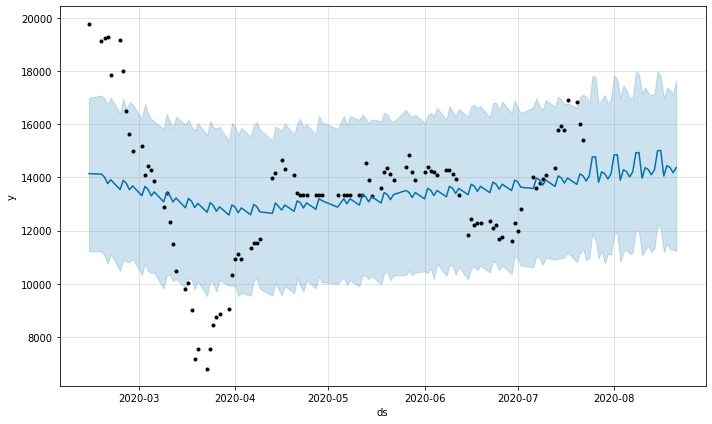

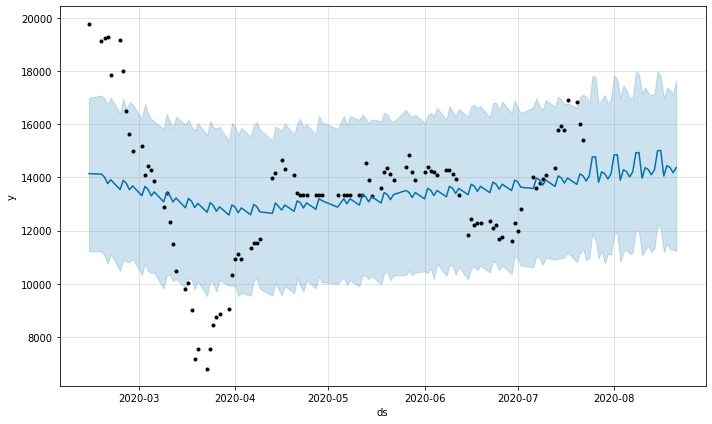

In [49]:
model.plot(forecast)

In [44]:
top10[0].head()

,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
date,,,,,,,,
2020-02-14,키이스트,54780,19787,1181.5,52.05,9731.18,29398.08,1.24
2020-02-18,키이스트,54780,19136,1182.2,52.05,9732.74,29232.19,1.23
2020-02-19,키이스트,54780,19261,1188.1,53.29,9817.18,29348.03,1.24
2020-02-20,키이스트,54780,19286,1190.8,53.78,9750.97,29219.98,1.23
2020-02-21,키이스트,54780,17858,1197.0,53.38,9576.59,28992.41,1.23


In [46]:
start_date = '2020-02-14'
end_date   = '2020-07-22'
# 관심 목록을 리스트로 구성해서 한번에 로드
stock_df   = data.get_data_yahoo( ['054780.KQ', '012790.KQ'], start_date, end_date)
stock_df.head()

[*********************100%***********************]  2 of 2 completed

2 Failed downloads:
- 012790.KQ: No data found for this date range, symbol may be delisted
- 054780.KQ: No data found for this date range, symbol may be delisted


Empty DataFrame
Columns: [(Adj Close, 012790.KQ), (Adj Close, 054780.KQ), (Close, 012790.KQ), (Close, 054780.KQ), (High, 012790.KQ), (High, 054780.KQ), (Low, 012790.KQ), (Low, 054780.KQ), (Open, 012790.KQ), (Open, 054780.KQ), (Volume, 012790.KQ), (Volume, 054780.KQ)]
Index: []

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f682f8230f0>,
      dtype=object)

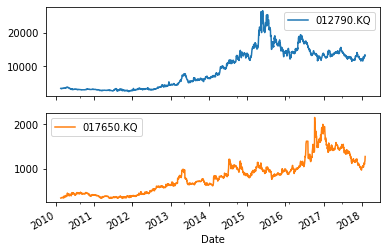

In [40]:
stock_df['Close'].plot(subplots=True)

In [41]:
import matplotlib.pyplot as plt

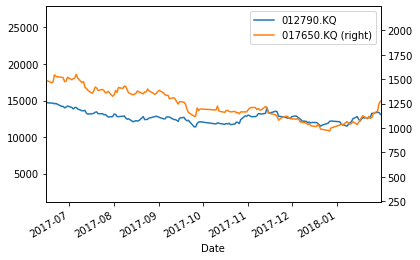

In [43]:
stock_df['Close'].plot(secondary_y='017650.KQ')
# 코로나 시기 이후로 주가 움직임이 유사해졌다 -> 코로나 이후로 차트를 제한
plt.xlim(stock_df.index[-150], stock_df.index[-1])
plt.show()
# 코로나 이후 추세는 유사하게 작동한다.

In [91]:
top10[9].head()

,name,code,Close,dollar,WTI,NASDAQ,DOW,interest_rate
date,,,,,,,,
2020-02-14,상아프론테크,89980,17750,1181.5,52.05,9731.18,29398.08,1.24
2020-02-18,상아프론테크,89980,17400,1182.2,52.05,9732.74,29232.19,1.23
2020-02-19,상아프론테크,89980,17150,1188.1,53.29,9817.18,29348.03,1.24
2020-02-20,상아프론테크,89980,17250,1190.8,53.78,9750.97,29219.98,1.23
2020-02-21,상아프론테크,89980,16450,1197.0,53.38,9576.59,28992.41,1.23


In [96]:
start_date = '2008-08-01'#'2010-01-01'
end_date = '2008-12-22'
TRADE_CODE = '035420.ks'
# 신일제약 012790
# 대림제지 017650
# 에프에스티 036810
# 동국S&C	100130
sinil_df = data.get_data_yahoo( ['012790.kq', '017650.kq', '036810.kq', '100130.kq'], start_date, end_date)
sinil_df.head(2)

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- 100130.KQ: Data doesn't exist for startDate = 1217548800, endDate = 1229904000


Adj Close              ...    Volume          
                       012790.KQ   017650.KQ  ... 036810.KQ 100130.KQ
Date                                          ...                    
2008-08-01 00:00:00  3779.951416  474.571411  ...     33700       NaN
2008-08-04 00:00:00  3647.994141  460.689972  ...     42600       NaN

[2 rows x 24 columns]

<Figure size 1080x720 with 0 Axes>

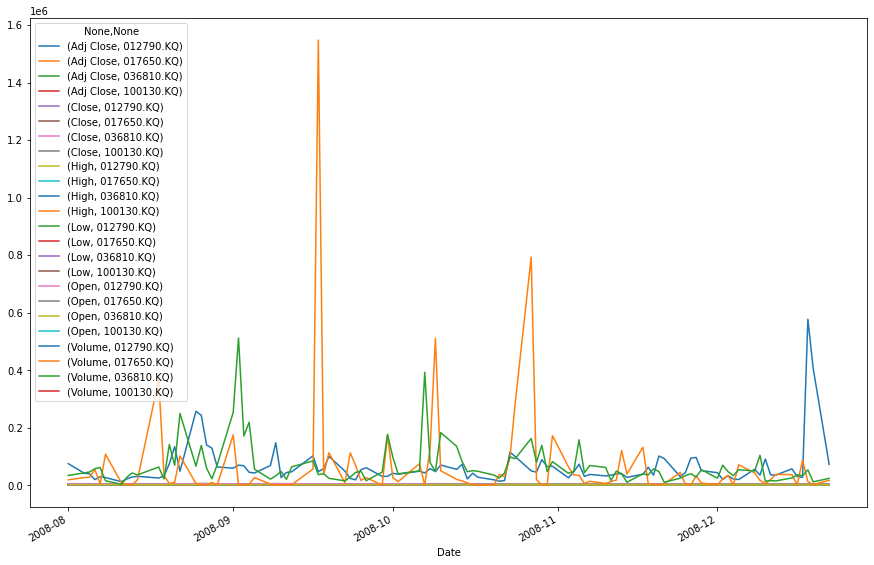

In [98]:
plt.figure(figsize=(15, 10))
sinil_df.plot(figsize=(15,10))
plt.show()